Ce noteBook permet de générer un rapport à partir des différents modèles entrainés.

# Package & data

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os


print(sns.__version__)

# assign directory
directory = '../models/best_player/'


0.13.0


In [2]:
# Load the training and testing data
data_split = joblib.load('../models/best_player/best_player_split.joblib')

# Extract split
X_train = data_split['X_train']
X_test = data_split['X_test']
y_train = data_split['y_train']
y_test = data_split['y_test']

# Model_report.txt

In [ ]:
# Ouvrir le fichier en mode écriture
with open('../models/best_player/model_report.txt', 'w') as report_file:

    # iterate over files in # that directory
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and f.endswith("model.joblib"):
            model_data = joblib.load(f)
            report_file.write(f"Informations pour le modèle: {model_data['name']}\n")
            report_file.write("----\n")

            # Best params (supposons qu'ils sont stockés dans le modèle)
            report_file.write(f"Best Params: {model_data['best_params']}\n")

            # Temps d'exécution de l'entraînement
            report_file.write(f"execution time search params: {model_data['execution_time_search_params']} seconds\n")

            # Temps d'exécution de l'entraînement
            report_file.write(f"Execution Time Training: {model_data['execution_time_training']} seconds\n")

            # Matrice de confusion
            report_file.write("Confusion Matrix:\n")
            report_file.write(f"{model_data['confusion_matrix']}\n")

            # Rapport de classification
            report_file.write("Classification Report:\n")
            report_file.write(f"{model_data['classification_report']}\n")

            report_file.write("----\n")

# Afficher un message indiquant que le rapport a été enregistré
print(f"Le rapport des modèles a été enregistré dans '{report_file.name}'")

# Models evaluation

In [4]:
# Créer une liste pour stocker les informations sur chaque modèle
models_info = []

# iterate over files in # that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and f.endswith("model.joblib"):
        model_data = joblib.load(f)
        info = {
            'model_name': model_data['name'],
            'execution_time_search_params': model_data['execution_time_search_params'],
            'execution_time_training': model_data['execution_time_training'],
            'accuracy': model_data['accuracy'],
            'precision': model_data['precision'],
            'recall': model_data['recall'],
            'f1_score': model_data['f1_score'],
            'auc': model_data['auc']
        }
        models_info.append(info)

# Créer un DataFrame à partir de la liste de dictionnaires
model_report = pd.DataFrame(models_info)
display(model_report)

,model_name,execution_time_search_params,execution_time_training,accuracy,precision,recall,f1_score,auc
0,gradient_boosting_model,450.580747,51.931351,0.615574,0.650902,0.374030,0.475069,0.638284
1,xgboost_model,680.792290,7.668790,0.615523,0.649553,0.376384,0.476601,0.637502
2,adaboost_model,303.553076,22.071540,0.614240,0.645119,0.379105,0.477567,0.633085
3,lightgbm_model,56.838564,0.763728,0.614804,0.650707,0.370831,0.472429,0.637457
4,logistic_model,1622.700043,30.173797,0.612393,0.633282,0.395764,0.487112,0.627609
5,decision_tree_model,67.241684,0.497732,0.611144,0.634255,0.387158,0.480818,0.630845


- **Accuracy :** Proportion des prédictions correctes par rapport à l'ensemble des prédictions.

- **Precision :** Proportion des vrais positifs parmi les prédictions positives du modèle.

- **Recall :** Proportion des vrais positifs parmi toutes les valeurs réelles positives.

- **F1 Score :** Moyenne harmonique de la précision et du rappel.

- **AUC (Area Under the Curve) :** Mesure de la capacité du modèle à discriminer entre les classes, en utilisant la courbe ROC.


In [5]:
# Afficher les informations spécifiques pour chaque modèle dans la sortie de la cellule
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and f.endswith("model.joblib"):
        model_data = joblib.load(f)

        # Afficher le nom du modèle
        print(f"Nom du modèle: {model_data['name']}")

        # Afficher les meilleures paramètres
        print(f"Meilleurs paramètres: {model_data['best_params']}")

        # Afficher le temps d'exécution d'entraînement
        print(f"Temps de recherche des hyperparametres : {model_data['execution_time_search_params']} seconds")

        # Afficher le temps d'exécution d'entraînement
        print(f"Temps d'exécution de l'entraînement: {model_data['execution_time_training']} seconds")

        # Afficher la matrice de confusion
        print("Matrice de confusion:")
        print(model_data['confusion_matrix'])

        # Afficher le rapport de classification
        print("Rapport de classification:")
        print(model_data['classification_report'])

        print("\n")


Nom du modèle: gradient_boosting_model
Meilleurs paramètres: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.6}
Temps de recherche des hyperparametres : 450.58074736595154 seconds
Temps d'exécution de l'entraînement: 51.93135070800781 seconds
Matrice de confusion:
[[25821  5455]
 [17022 10171]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.60      0.83      0.70     31276
           1       0.65      0.37      0.48     27193

    accuracy                           0.62     58469
   macro avg       0.63      0.60      0.59     58469
weighted avg       0.63      0.62      0.59     58469



Nom du modèle: xgboost_model
Meilleurs paramètres: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.6}
Temps de recherche des hyperparametres : 680.7922897338867 seconds
Temps d'exécution de l'entraînement: 7.668790340423584 seconds
Matrice de confusion:

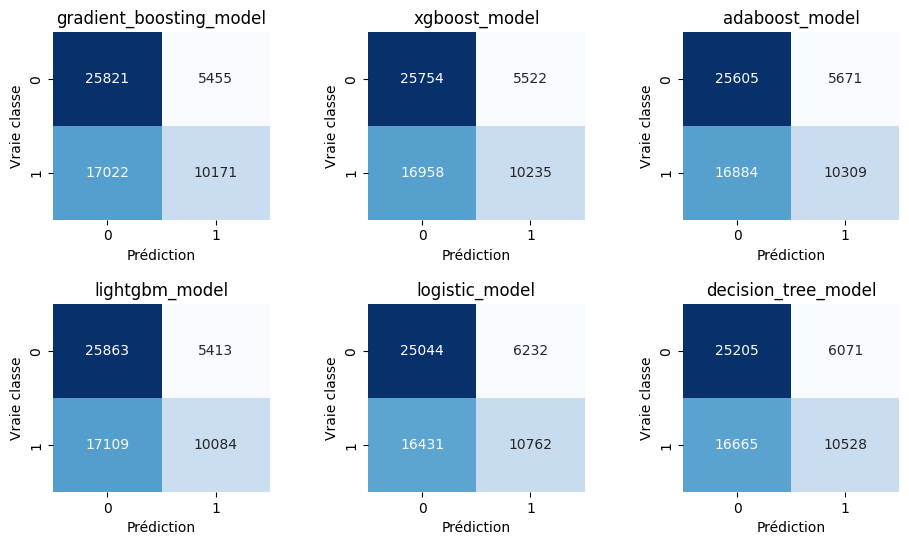

In [6]:
# Créer une figure avec une grille de sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Ajuster l'espacement entre les sous-graphiques
fig.tight_layout(pad=4.0)

i = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and f.endswith("model.joblib"):
        model_data = joblib.load(f)
        # Obtenir la matrice de confusion
        cm = model_data['confusion_matrix']

        # Calculer les coordonnées dans la grille (2 lignes, 3 colonnes)
        row = i // 3
        col = i % 3

        # Créer un sous-graphique
        ax = axes[row, col]

        # Utiliser seaborn pour afficher la matrice de confusion sous forme de heatmap
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, ax=ax)

        # Configurer le titre et les étiquettes
        ax.set_title(model_data['name'])
        ax.set_xlabel('Prédiction')
        ax.set_ylabel('Vraie classe')

        i += 1

        # Afficher le graphique
plt.show()
